In [3]:
import os
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# kaggle.json 파일 열어서 user명과 key값 확인
os.environ['KAGGLE_USERNAME'] = 'seopshin'
os.environ['KAGGLE_KEY'] = 'd098245fa9248c7e3fd3718c301d0204'


In [4]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings


In [10]:
!kaggle datasets download uciml/red-wine-quality-cortez-et-al-2009


  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 9.35MB/s]


In [7]:
import os
 
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
 
createFolder('./zip')


In [58]:
#---------------------------------------------------------------------------------------
import zipfile
fantasy_zip = zipfile.ZipFile('red-wine-quality-cortez-et-al-2009.zip')
fileName=fantasy_zip.namelist()[0]
fantasy_zip.extract(fileName,'./zip')

#fantasy_zip.close()


'zip/winequality-red.csv'

In [59]:
import pandas as pd
df = pd.read_csv('./zip/winequality-red.csv')
df
# from glob import glob
# df = pd.read_csv(glob('./zip/*.csv)[0])
# df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# uciml/red-wine-quality-cortez-et-al-2009
# 와인 퀄리티 자료를 작성 > > 6.5보다 높으면 good 
# volatile acidity 휘발성 산 :와인향을 결정
# fixed acidity 결합산 : 와인의 산도를 제어한다.
# 

In [71]:
# https://www.kaggle.com/egemenuurdalg/linear-regression
# 와인의 품질을 0-10 사이의 숫자로 예측
from statsmodels.api import OLS, add_constant        # p-value 나 회귀계수를 확인할 수 있음.
from sklearn.linear_model import LinearRegression    # 회귀분석 모델
from sklearn.metrics import mean_squared_error      # 에러값
from sklearn.datasets import make_regression        # 회귀분석용 가상데이터 생성
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score     # 데이터 나눔 
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize         # 정규화

In [14]:
data = df
data.isnull().sum() # na값 확인

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
# x,y데이터 분리
y = data.quality
X = data.drop(['quality'],axis=1)

# 트레이닝, 테스트 데이터 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [31]:
ols_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8056.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        02:21:05   Log-Likelihood:                         -1192.1
No. Observations:                1199   AIC:                                      2406.
Df Residuals:                    1188   BIC:                                      2462.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0032      0.019      0.167      0.868      -0.034       0.041
volatile acidity        -1.0221      0.140     -7.276      0.000      -1.298      -0.746
citric acid             -0.1352      0.173     -0.783      0.434      -0.474       0.204
residual sugar           0.0001      0.014      0.010      0.992      -0.027       0.028
chlorides               -1.7809      0.471     -3.778      0.000      -2.706      -0.856
free sulfur dioxide      0.0052      0.003      2.008      0.045       0.000       0.010
total sulfur dioxide    -0.0037      0.001     -4.364      0.000      -0.005      -0.002
density                  4.2080      0.724      5.809      0.000       2.787       5.629
pH                      -0.4428      0.186     -2.385      0.017      -0.807      -0.079
sulphates                0.7928      0.126      6.295      0.000       0.546       1.040
alcohol                  0.3050      0.020     14.944      0.000       0.265       0.345
==============================================================================
Omnibus:                       26.033   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.079
Skew:                          -0.179   Prob(JB):                     7.29e-10
Kurtosis:                       3.845   Cond. No.                     2.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# p-value 값이 높은값(일반적으로 0.05) 제거
X.drop(['fixed acidity','citric acid','residual sugar'],axis=1,inplace=True)


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [34]:
ols_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.110e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        02:21:17   Log-Likelihood:                         -1192.4
No. Observations:                1199   AIC:                                      2401.
Df Residuals:                    1191   BIC:                                      2442.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -0.9593      0.117     -8.200      0.000      -1.189      -0.730
chlorides               -1.8737      0.445     -4.212      0.000      -2.746      -1.001
free sulfur dioxide      0.0056      0.003      2.200      0.028       0.001       0.011
total sulfur dioxide    -0.0039      0.001     -4.815      0.000      -0.005      -0.002
density                  4.0671      0.467      8.706      0.000       3.151       4.984
pH                      -0.3980      0.137     -2.913      0.004      -0.666      -0.130
sulphates                0.7895      0.125      6.294      0.000       0.543       1.036
alcohol                  0.3012      0.020     15.222      0.000       0.262       0.340
==============================================================================
Omnibus:                       26.495   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.808
Skew:                          -0.183   Prob(JB):                     5.06e-10
Kurtosis:                       3.850   Cond. No.                     1.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#X_train=add_constant(X_train)
#X_test=add_constant(X_test)
#ols_model=OLS(y_train,X_train)
#results=ols_model.fit()
#esults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     81.64
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          1.40e-107
Time:                        02:03:41   Log-Likelihood:                -1192.2
No. Observations:                1199   AIC:                             2402.
Df Residuals:                    1190   BIC:                             2448.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5998     12.450      0.691      0.490     -15.826      33.026
volatile acidity        -0.9577      0.117     -8.183      0.000      -1.187      -0.728
chlorides               -1.8862      0.445     -4.236      0.000      -2.760      -1.013
free sulfur dioxide      0.0055      0.003      2.175      0.030       0.001       0.010
total sulfur dioxide    -0.0039      0.001     -4.829      0.000      -0.005      -0.002
density                 -4.4148     12.288     -0.359      0.719     -28.523      19.693
pH                      -0.4222      0.141     -2.993      0.003      -0.699      -0.145
sulphates                0.8023      0.127      6.326      0.000       0.554       1.051
alcohol                  0.2943      0.022     13.283      0.000       0.251       0.338
==============================================================================
Omnibus:                       25.683   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.215
Skew:                          -0.179   Prob(JB):                     1.12e-09
Kurtosis:                       3.835   Cond. No.                     5.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
print(results.predict(X_test)[0:5])
print()

803     5.332023
124     5.038873
350     5.616547
682     5.468969
1326    5.759155
dtype: float64



In [70]:
def rounder(array):
    rounded_array=[]
    for i in array:
        rounded_array.append(int(i))
    return np.array(rounded_array)

In [35]:
ols_pred=results.predict(X_test)
rounded_pred_ols=rounder(ols_pred)

# rmse 는 낮을수록 좋음
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}')

The RMSE of sklearn model: 0.8215838362577492


In [36]:
sub=(results.predict(X_test)-round(y_test,0))**2
np.sqrt(np.mean(sub))

0.6241720095645908

In [37]:
lm=LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: ', np.round(lm.coef_,2))     # w 값
print('Intercept: ', np.round(lm.intercept_,2))   # b 값


Coefficients:  [-0.96 -1.89  0.01 -0.   -4.41 -0.42  0.8   0.29]
Intercept:  8.6


In [38]:
preds=lm.predict(X_test)
rounded_pred_lm=rounder(preds)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(y_test,rounded_pred_lm))}')

The RMSE of sklearn model: 0.8276472678623424


### 다른 방법으로 작업함
- https://www.kaggle.com/henriqueosinski/eda-and-multi-class-classification
- 멀티클래스: 다항분류(레이블결과값이 3개 이상인 경우)
  딥러닝에서 사진한장에 여러개의 의미가 부여된것을 멀티클래스라고 함

In [40]:
import numpy as np 
import pandas as pd 
import plotly.express as px        # 플로틀리 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [42]:
df = data

In [43]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [44]:
px.histogram(df,x = 'quality')

In [45]:
df[df['quality']==3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [46]:
df[df['total sulfur dioxide']>=150]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5
1079,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6


In [48]:
tmp=df[df['quality']==3]
tmp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.0
mean,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.57000,9.955000,3.0
std,1.770875,0.331256,0.250664,1.401596,0.066241,9.763879,16.828877,0.002002,0.144052,0.12202,0.818009,0.0
min,6.700000,0.440000,0.000000,1.200000,0.061000,3.000000,9.000000,0.994710,3.160000,0.40000,8.400000,3.0
25%,7.150000,0.647500,0.005000,1.875000,0.079000,5.000000,12.500000,0.996150,3.312500,0.51250,9.725000,3.0
50%,7.500000,0.845000,0.035000,2.100000,0.090500,6.000000,15.000000,0.997565,3.390000,0.54500,9.925000,3.0
75%,9.875000,1.010000,0.327500,3.100000,0.143000,14.500000,42.500000,0.998770,3.495000,0.61500,10.575000,3.0
max,11.600000,1.580000,0.660000,5.700000,0.267000,34.000000,49.000000,1.000800,3.630000,0.86000,11.000000,3.0


In [50]:
#tmp=df[df['quality']==5]
#tmp.describe()
df['relative sulphur'] = df['free sulfur dioxide']/df['total sulfur dioxide']
print([i for i in df.columns])
fig = px.imshow(df.corr())
fig.show()
px.scatter(df , x = 'alcohol', y = 'fixed acidity',color = 'quality')

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'relative sulphur']


In [51]:
n_neigh = len(np.unique(df['quality']))
y = df.pop('quality')

x = df.values

In [52]:
from sklearn.preprocessing import StandardScaler
SE = StandardScaler()
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state = 42)
SE.fit(x_train)
x_train = SE.transform(x_train)
x_test = SE.transform(x_test)

In [53]:
model = KNeighborsClassifier(n_neighbors = n_neigh)
model.fit(x_train,y_train)
print(f'Average K neighbors precision {model.score(x_test,y_test)}')

Average K neighbors precision 0.59


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.62      0.76      0.68       164
           6       0.57      0.54      0.56       169
           7       0.57      0.42      0.48        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.29      0.29      0.29       400
weighted avg       0.57      0.59      0.57       400

[[  0   0   0   1   0   0]
 [  0   0   7   6   0   0]
 [  0   1 124  36   3   0]
 [  0   4  64  92   9   0]
 [  0   0   5  23  20   0]
 [  0   0   0   2   3   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



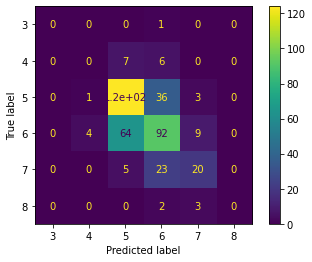

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
prediction = model.predict(x_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))
plot_confusion_matrix(model, x_test, y_test) 

AttributeError: ignored

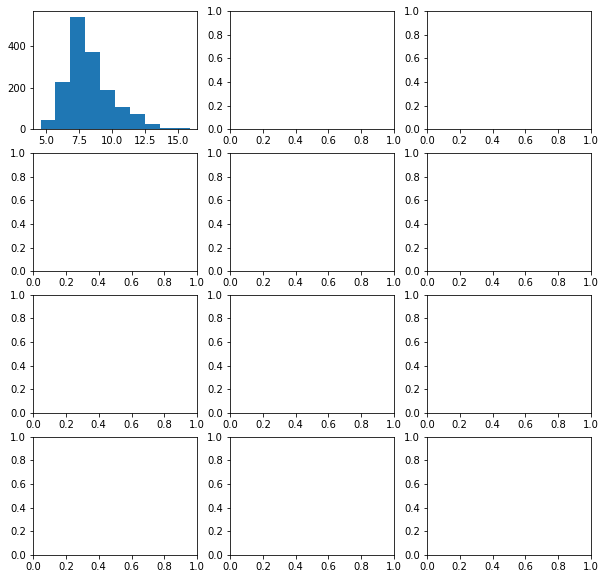

In [55]:
df.hist(bin=25,figsize=(10,10))
plt.show()

<BarContainer object of 1599 artists>

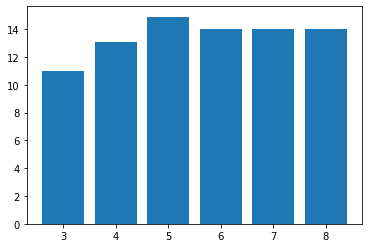

In [60]:
plt.bar(df['quality'],df['alcohol'])

In [80]:
# 다중공산성 삭제( 각 x값들끼리의 상관도가 너무 높아서 생기는 문제를 미리 제거)
# 일단은 모두로 작업해보겠습니다.
X = df.drop(['quality','total sulfur dioxide'],axis=1) 
y = df['quality']

# 트레이닝
# 테스트 데이터 분리
# 표준화시켜서
# 회귀분석 rmse값 출력

# 로지스틱회귀 rmse값 출력


In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, y_train)

print(lr.score(train_scaled,y_train))
print(lr.score(test_scaled,y_test))

0.6063386155129274
0.5575


In [84]:
sub=(lr.predict(test_scaled)-round(y_test,0))**2
np.sqrt(np.mean(sub))

0.7035623639735145

In [78]:
ols_model=OLS(y_test,test_scaled)
results=ols_model.fit()

In [79]:
ols_pred=results.predict(test_scaled)
rounded_pred_ols=rounder(ols_pred)

# rmse 는 낮을수록 좋음
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}')

The RMSE of sklearn model: 5.671639974469465


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, y_train)
sub=(lr.predict(test_scaled)-round(y_test,0))**2     ###
np.sqrt(np.mean(sub))                    #### 로지스틱 회귀 rmse

##########
ols_model=OLS(y_test,test_scaled)
results=ols_model.fit()
ols_pred=results.predict(test_scaled)
rounded_pred_ols=rounder(ols_pred)

# rmse 는 낮을수록 좋음
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}') ### 회귀 rmse

In [ ]:
# 회귀분석은 3.2 2.3 이런식으로 나옴
# 그래서 이작업에서는 round등의 작업이 수행됨

In [87]:
# 방법1
tmp=[]
for x in df['quality']:
  if x>6.5:
     tmp.append('good')
  else:
     tmp.append('bad')

In [88]:
df['new_quality']=tmp

In [89]:
# 방법2
df['new_quality']= ['good' if x>6.5 else 'bad' for x in df['quality']]

In [91]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [92]:
# 방법 3
def function_quality(x):
  if x['quality']>=6.5:
    return 'good'
  else:
    return 'bad'

df['new_quality']=df.apply(function_quality,axis=1)

In [93]:
## new_quality는 문자열임
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['new_quality']=label.fit_transform(df['new_quality'])

In [96]:
# 영어순이기 때문에 0은 bad 1은 good
df['new_quality'].groupby(df['new_quality']).count()

new_quality
0    1382
1     217
Name: new_quality, dtype: int64

In [ ]:
X=df.drop(['quality','total sulfur dioxide','new_quality'])